In [281]:
from pymongo import MongoClient
client = MongoClient("mongodb://localhost:27017")
db = client["Ironhack"]
c = db.get_collection('I')
from bson.decimal128 import Decimal128
import re
c.find_one()

{'_id': ObjectId('52cdef7c4bab8bd675297d8a'),
 'name': 'Wetpaint',
 'permalink': 'abc2',
 'crunchbase_url': 'http://www.crunchbase.com/company/wetpaint',
 'homepage_url': 'http://wetpaint-inc.com',
 'blog_url': 'http://digitalquarters.net/',
 'blog_feed_url': 'http://digitalquarters.net/feed/',
 'twitter_username': 'BachelrWetpaint',
 'category_code': 'web',
 'number_of_employees': 47,
 'founded_year': 2005,
 'founded_month': 10,
 'founded_day': 17,
 'deadpooled_year': 1,
 'tag_list': 'wiki, seattle, elowitz, media-industry, media-platform, social-distribution-system',
 'alias_list': '',
 'email_address': 'info@wetpaint.com',
 'phone_number': '206.859.6300',
 'description': 'Technology Platform Company',
 'created_at': datetime.datetime(2007, 5, 25, 6, 51, 27),
 'updated_at': 'Sun Dec 08 07:15:44 UTC 2013',
 'overview': '<p>Wetpaint is a technology platform company that uses its proprietary state-of-the-art technology and expertise in social media to build and monetize audiences for di

In [282]:
#Developers like to be near successful tech startups that have raised at least 1 Million dollars.
#Designers like to go to design talks and share knowledge. There must be some nearby companies that also do design.

In [283]:
pipeline = [
    {"$match": {"category_code": "games_video"}},
    {"$unwind": "$offices"},
    {"$group": {"_id": "$offices.country_code", "count": {"$sum": 1}}}
]

result = list(c.aggregate(pipeline))
result

[{'_id': 'USA', 'count': 587},
 {'_id': 'ESP', 'count': 14},
 {'_id': 'ARM', 'count': 1},
 {'_id': 'QAT', 'count': 1},
 {'_id': 'ISR', 'count': 20},
 {'_id': 'MEX', 'count': 4},
 {'_id': 'CRI', 'count': 1},
 {'_id': 'LVA', 'count': 1},
 {'_id': 'FRA', 'count': 26},
 {'_id': 'BRB', 'count': 1},
 {'_id': 'RUS', 'count': 4},
 {'_id': 'NLD', 'count': 10},
 {'_id': 'NOR', 'count': 3},
 {'_id': 'FIN', 'count': 3},
 {'_id': 'ROM', 'count': 2},
 {'_id': 'AUT', 'count': 3},
 {'_id': 'ARG', 'count': 5},
 {'_id': 'BGD', 'count': 1},
 {'_id': 'TUR', 'count': 2},
 {'_id': 'TWN', 'count': 2},
 {'_id': 'MLT', 'count': 3},
 {'_id': 'ITA', 'count': 7},
 {'_id': 'BEL', 'count': 2},
 {'_id': 'ISL', 'count': 2},
 {'_id': 'CAN', 'count': 35},
 {'_id': 'BRA', 'count': 2},
 {'_id': 'DNK', 'count': 5},
 {'_id': 'HKG', 'count': 1},
 {'_id': 'SWE', 'count': 11},
 {'_id': 'MYS', 'count': 2},
 {'_id': 'GRC', 'count': 1},
 {'_id': 'SVN', 'count': 1},
 {'_id': 'CHN', 'count': 17},
 {'_id': 'IND', 'count': 15},
 {'_

In [284]:
#GBR, ESP, FRA are 3 European countries with a decent amount of video game companies. Let's check if they also meet criteria for presence of successful start ups

In [285]:
condition1 = {"category_code": "games_video"} #vid game design
condition2 = {f"number_of_employees": {"$lt": 200}} #start-up characteristic
condition3 = {f"founded_year": {"$gte": 2010}} #start-up characteristic
regex_pattern = re.compile(r'\d+\.\d+M')
condition4 = {"total_money_raised": {"$regex": regex_pattern}}# Query condition to match companies with at least 1 million raised
condition5 = {f"offices.country_code": {"$in": ["ESP", "GBR", "FRA"]}}

In [286]:
pipeline = [
    {"$match": {"$and": [condition2, condition4]}},
    {"$unwind": "$offices"},
    {"$group": {"_id": "$offices.country_code", "count": {"$sum": 1}}},
    {"$sort": {"count": -1}}
    ]

result = list(c.aggregate(pipeline))
result

[{'_id': 'USA', 'count': 854},
 {'_id': 'GBR', 'count': 101},
 {'_id': 'FRA', 'count': 32},
 {'_id': 'ISR', 'count': 31},
 {'_id': 'CAN', 'count': 29},
 {'_id': 'DEU', 'count': 20},
 {'_id': 'IND', 'count': 14},
 {'_id': 'ESP', 'count': 13},
 {'_id': 'NLD', 'count': 12},
 {'_id': 'AUS', 'count': 10},
 {'_id': 'SWE', 'count': 9},
 {'_id': 'JPN', 'count': 8},
 {'_id': 'IRL', 'count': 8},
 {'_id': 'CHN', 'count': 8},
 {'_id': 'DNK', 'count': 8},
 {'_id': 'SGP', 'count': 7},
 {'_id': 'BEL', 'count': 7},
 {'_id': 'CHE', 'count': 4},
 {'_id': 'ROM', 'count': 4},
 {'_id': 'FIN', 'count': 4},
 {'_id': 'HKG', 'count': 4},
 {'_id': 'ITA', 'count': 4},
 {'_id': 'KOR', 'count': 3},
 {'_id': 'ZAF', 'count': 3},
 {'_id': 'NOR', 'count': 3},
 {'_id': 'ARG', 'count': 3},
 {'_id': 'PHL', 'count': 2},
 {'_id': 'CZE', 'count': 2},
 {'_id': 'MYS', 'count': 2},
 {'_id': 'COL', 'count': 1},
 {'_id': 'PRK', 'count': 1},
 {'_id': 'LUX', 'count': 1},
 {'_id': 'HUN', 'count': 1},
 {'_id': 'THA', 'count': 1},
 {

In [287]:
#GBR, FRA, ESP all good again for small companies with total raised above $1M.

In [288]:
#Looking in Europe because having bars, public space/daycare close by for kids etc is much easier in Europe in my opinion

In [289]:
#New idea - do London, Madrid and maybe SF - 
#rather than pre-filtering to Europe, compare European to 1 american city and show things like:
    #distribution of closeness of bars, parks/public space for kids
    #public transport options
    #advantage of SF is closeness of other companies, design companies, successful startups

In [290]:
pipeline = [
    {"$match": {"$and": [condition2, condition4]}},
    {"$unwind": "$offices"},
    {"$group": {"_id": "$offices.city", "count": {"$sum": 1}}},
    {"$sort": {"count": -1}}
    ]

result = list(c.aggregate(pipeline))
result

[{'_id': 'San Francisco', 'count': 136},
 {'_id': 'New York', 'count': 111},
 {'_id': 'London', 'count': 57},
 {'_id': 'Seattle', 'count': 38},
 {'_id': 'San Mateo', 'count': 30},
 {'_id': 'Palo Alto', 'count': 28},
 {'_id': 'Paris', 'count': 23},
 {'_id': 'Cambridge', 'count': 23},
 {'_id': 'Austin', 'count': 23},
 {'_id': 'Mountain View', 'count': 22},
 {'_id': 'Boston', 'count': 20},
 {'_id': 'Los Angeles', 'count': 19},
 {'_id': 'Redwood City', 'count': 18},
 {'_id': '', 'count': 15},
 {'_id': 'Sunnyvale', 'count': 15},
 {'_id': 'San Jose', 'count': 13},
 {'_id': 'Santa Monica', 'count': 13},
 {'_id': 'Boulder', 'count': 12},
 {'_id': 'Chicago', 'count': 12},
 {'_id': 'Portland', 'count': 10},
 {'_id': 'Amsterdam', 'count': 9},
 {'_id': 'San Diego', 'count': 9},
 {'_id': 'Santa Clara', 'count': 8},
 {'_id': 'Denver', 'count': 8},
 {'_id': 'Tel Aviv', 'count': 8},
 {'_id': 'Singapore', 'count': 7},
 {'_id': 'Menlo Park', 'count': 7},
 {'_id': 'Toronto', 'count': 7},
 {'_id': 'Berlin

In [291]:
pipeline = [
    {"$match": {"$and": [condition1]}},
    {"$unwind": "$offices"},
    {"$group": {"_id": "$offices.city", "count": {"$sum": 1}}},
    {"$sort": {"count": -1}}
    ]

result = list(c.aggregate(pipeline))
result

[{'_id': 'New York', 'count': 75},
 {'_id': 'San Francisco', 'count': 68},
 {'_id': '', 'count': 54},
 {'_id': 'London', 'count': 36},
 {'_id': 'Los Angeles', 'count': 31},
 {'_id': 'Paris', 'count': 17},
 {'_id': 'Palo Alto', 'count': 16},
 {'_id': 'Santa Monica', 'count': 14},
 {'_id': 'Seattle', 'count': 13},
 {'_id': None, 'count': 10},
 {'_id': 'Tokyo', 'count': 9},
 {'_id': 'Stockholm', 'count': 9},
 {'_id': 'San Mateo', 'count': 9},
 {'_id': 'Shanghai', 'count': 8},
 {'_id': 'Berlin', 'count': 8},
 {'_id': 'Chicago', 'count': 8},
 {'_id': 'Cambridge', 'count': 8},
 {'_id': 'Austin', 'count': 8},
 {'_id': 'Sunnyvale', 'count': 8},
 {'_id': 'Vancouver', 'count': 7},
 {'_id': 'Beverly Hills', 'count': 6},
 {'_id': 'Miami', 'count': 6},
 {'_id': 'Amsterdam', 'count': 6},
 {'_id': 'San Jose', 'count': 6},
 {'_id': 'Brooklyn', 'count': 6},
 {'_id': 'Mountain View', 'count': 6},
 {'_id': 'Redwood City', 'count': 6},
 {'_id': 'Toronto', 'count': 6},
 {'_id': 'Ramat Gan', 'count': 6},
 {

In [292]:
#1. Locations of vgame design and tech start ups in each of 3 cities - make a centroid for each as a reference point to compare the cities? Or pick an area where there are many? 
#2. Judge by:
        # A. Staff having kids - cater to young professional, young parents demographic.
            #Criteria - nurseries/guarderia/kindergarten
            #Public space, parks, children's playgrounds - could do 30 closest, plot distribution of how close? 
        # B. Proximity of bars
            #Plot distribution of 50 closest bars?
        # C. Airport
            #Proximity to airport + public transportation
        #D. Quickly - presence of other companies, already kind of done
#3. Within chosen city: 
        # A. Where do 'strong points' stand out most? 
        # B. Repeat criteria for 2, compare 2 or 3 neighbourhoods for most important criteria.
        # C. Los caprichos - see if any of those niehgbourhoods get 'bonus points' for proximity of starbucks, vegan food, basketball, or dog hairdresser.
        

In [293]:
# This is going to be too much work unless I find a quick and efficient way of coding it all and applying it to 3 cities (I won't)
# Using the info on video game companies and start ups I will look at the location of companies in one city and choose a neighbourhood in that city. No comparing between cities.
# Still use similar filter criteria to above

In [294]:
#1. What are the 6 start ups with over 1M raised in Madrid? Location (DF)
#2. What are the 6 video game companies in Madrid? Location (DF)

#For these locations, look for closest: Bars, nurseries, parks for children/parks, + distance from Barajas.
#Check if they get any bonus points for proximity to starbucks, vegan places, basketball stadium, dog hairdresser.

In [295]:
condition1 = {"category_code": "games_video"} #vid game design
condition2 = {f"number_of_employees": {"$lt": 200}} #start-up characteristic
condition3 = {f"founded_year": {"$gte": 2010}} #start-up characteristic
regex_pattern = re.compile(r'\d+\.\d+M')
condition4 = {"total_money_raised": {"$regex": regex_pattern}}# Query condition to match companies with at least 1 million raised
condition5 = {f"offices.country_code": {"$in": ["ESP", "GBR", "FRA"]}}
condition6 = {"offices.city": "Madrid"}

madrid_startups = list(c.find({"$and": [condition6, condition2, condition4]}, projection = {"_id":0, "name":1, "offices.city":1, "total_money_raised":1, "number_of_employees":1, "category_code": 1, "offices.latitude":1, "offices.longitude":1}))
madrid_startups

[{'name': 'eRepublik',
  'category_code': 'games_video',
  'number_of_employees': 30,
  'total_money_raised': '€2.75M',
  'offices': [{'city': 'Madrid',
    'latitude': 40.43094,
    'longitude': -3.6952896},
   {'city': 'Dublin', 'latitude': None, 'longitude': None},
   {'city': 'Bucuresti', 'latitude': None, 'longitude': None}]},
 {'name': 'Videoplaza',
  'category_code': 'advertising',
  'number_of_employees': 70,
  'total_money_raised': '€15.9M',
  'offices': [{'city': 'London',
    'latitude': 51.5212481,
    'longitude': -0.1020894},
   {'city': 'Stockholm', 'latitude': 59.3351833, 'longitude': 18.0333601},
   {'city': 'Berlin', 'latitude': 52.5372765, 'longitude': 13.3787413},
   {'city': 'Singapore', 'latitude': 1.2821008, 'longitude': 103.8508327},
   {'city': 'Madrid', 'latitude': 40.4596242, 'longitude': -3.6923285}]},
 {'name': 'Busuu',
  'category_code': 'social',
  'number_of_employees': 25,
  'total_money_raised': '$4.7M',
  'offices': [{'city': 'Madrid',
    'latitude':

In [296]:
madrid_vidgames = list(c.find({"$and": [condition6, condition1]}, projection = {"_id":0, "name":1, "offices.city":1, "total_money_raised":1, "number_of_employees":1, "category_code": 1, "offices.latitude":1, "offices.longitude":1}))
madrid_vidgames



[{'name': 'eRepublik',
  'category_code': 'games_video',
  'number_of_employees': 30,
  'total_money_raised': '€2.75M',
  'offices': [{'city': 'Madrid',
    'latitude': 40.43094,
    'longitude': -3.6952896},
   {'city': 'Dublin', 'latitude': None, 'longitude': None},
   {'city': 'Bucuresti', 'latitude': None, 'longitude': None}]},
 {'name': 'VivoCom',
  'category_code': 'games_video',
  'number_of_employees': 22,
  'total_money_raised': '$0',
  'offices': [{'city': 'Madrid', 'latitude': None, 'longitude': None}]},
 {'name': 'Cyloop',
  'category_code': 'games_video',
  'number_of_employees': 50,
  'total_money_raised': '$0',
  'offices': [{'city': 'Miami', 'latitude': 25.787252, 'longitude': -80.13183},
   {'city': 'Madrid', 'latitude': 40.5288449, 'longitude': -3.6429907},
   {'city': 'El Segundo', 'latitude': 33.918589, 'longitude': -118.393719}]},
 {'name': 'Entropy Computational Services',
  'category_code': 'games_video',
  'number_of_employees': 5,
  'total_money_raised': '$0',


In [297]:
#now - for each of these locations, I want 
        #the 10 closest bars + their distance from the location
        #5 closest nurseries + distance from location
        #5 closest parks + distance from location
        #Distance from airport/metro lines to airport.
        
        #Proximity to a starbucks
        
        #Basketball stadium (Wizink)?, Vegan place + dog hairdresser

In [298]:
def foursquare_bar (lat, lon, sort = "DISTANCE"):
    url = f"https://api.foursquare.com/v3/places/search?query=bar&ll={lat}%2C{lon}&radius=1000&sort=DISTANCE&limit=10"
    headers = {
        "accept": "application/json",
        "Authorization": "fsq3zJlP+zylHII9gRWfq9KurwhB8+0LPJw/XnnFyamdXaE="}
        
    response = requests.get(url, headers=headers)
    return response.json()
    

In [299]:
#I'm now trying to apply this function to each office I'm looking at and store the info in a 
    
    

In [300]:
#attempt 1

In [301]:
def bars_dataframe():
    vidgame_company_data = {}
    for i in madrid_vidgames:
        company_city = i['offices'][0]['city']
        company_name = i['name']
        company_type = 'Video Games'
        company_latitude = i['offices'][0]["latitude"]
        company_longitude = i['offices'][0]["longitude"]
        if company_latitude and company_longitude:

            if company_city == "Madrid":
                office_w_bars= foursquare_bar(company_latitude, company_longitude)
                bar_list= []
                for bar in office_w_bars['results']:

                    bar_info = {
                        'name': bar['name'],
                        'distance': bar['distance'],
                        'latitude': bar['geocodes']['main']['latitude'],
                        'longitude': bar['geocodes']['main']['longitude'],
                        'category': 'Bar'
                    }

                    bar_list.append(bar_info)


                company_info = {
                    'company_name': company_name,
                    'company_type': company_type,
                    'company_city': company_city,
                    'company_latitude': company_latitude,
                    'company_longitude': company_longitude,
                    'company_bars': bar_list            
                }

                vidgame_company_data[company_name] = company_info
    df_vidgame = pd.DataFrame(vidgame_company_data).T
    df_vidgame = df_vidgame.explode("company_bars")
    df_vidgame['venue_category'] = df_vidgame['company_bars'].apply(lambda x: x['category'] if x else None)
    df_vidgame['venue_name'] = df_vidgame['company_bars'].apply(lambda x: x['name'] if x else None)
    df_vidgame['venue_distance'] = df_vidgame['company_bars'].apply(lambda x: x['distance'] if x else None)
    df_vidgame['venue_latitude'] = df_vidgame['company_bars'].apply(lambda x: x['latitude'] if x else None)
    df_vidgame['venue_longitude'] = df_vidgame['company_bars'].apply(lambda x: x['longitude'] if x else None)
    df_vidgame = df_vidgame.drop(columns='company_bars')

    startup_company_data = {}
    for y in madrid_startups:
        company_city_startups = y['offices'][0]['city']
        company_name_startups = y['name']
        company_type_startups = 'Start Up (>$1M Raised)'
        company_latitude_startups = y['offices'][0]["latitude"]
        company_longitude_startups = y['offices'][0]["longitude"]
        if company_latitude_startups and company_longitude_startups:

            if company_city_startups == "Madrid":
                office_w_bars_startups= foursquare_bar(company_latitude_startups, company_longitude_startups)
                bar_list_startups= []
                for bar in office_w_bars_startups['results']:

                    bar_info_startups = {
                        'name': bar['name'],
                        'distance': bar['distance'],
                        'latitude': bar['geocodes']['main']['latitude'],
                        'longitude': bar['geocodes']['main']['longitude'],
                        'category': 'Bar'
                    }

                    bar_list_startups.append(bar_info_startups)


                startup_company_info = {
                    'company_name': company_name_startups,
                    'company_type': company_type_startups,
                    'company_city': company_city_startups,
                    'company_latitude': company_latitude_startups,
                    'company_longitude': company_longitude_startups,
                    'company_bars': bar_list_startups
                }

                startup_company_data[company_name_startups] = startup_company_info
    df_startups = pd.DataFrame(startup_company_data).T
    df_startups = df_startups.explode("company_bars")
    df_startups['venue_category'] = df_startups['company_bars'].apply(lambda x: x['category'] if x else None)
    df_startups['venue_name'] = df_startups['company_bars'].apply(lambda x: x['name'] if x else None)
    df_startups['venue_distance'] = df_startups['company_bars'].apply(lambda x: x['distance'] if x else None)
    df_startups['venue_latitude'] = df_startups['company_bars'].apply(lambda x: x['latitude'] if x else None)
    df_startups['venue_longitude'] = df_startups['company_bars'].apply(lambda x: x['longitude'] if x else None)
    df_startups = df_startups.drop(columns='company_bars')

    concatenated_df_companies_bars = pd.concat([df_vidgame, df_startups], ignore_index=False)
    subset_columns = ['company_name', 'company_latitude', 'company_longitude', 'venue_category', 'venue_name', 'venue_distance']
    concatenated_df_companies_bars = concatenated_df_companies_bars.drop_duplicates(subset=subset_columns, keep='first')
    concatenated_df_companies_bars.to_csv('data/concatenated_df_companies_bars.csv', index=False)
    
    return concatenated_df_companies_bars

In [316]:
concatenated_df_companies_bars = bars_dataframe()

In [303]:
#Now going to try a function which adds the same info bur for nurseries (3) airport (1), and starbucks (1)

In [304]:
#first edit the foursquare function

In [305]:
def foursquare_add_venues (venue, lat, lon, radius, limit, sort = "DISTANCE"):
    
    url = f"https://api.foursquare.com/v3/places/search?query={venue}&ll={lat}%2C{lon}&radius={radius}&sort=DISTANCE&limit={limit}"
    headers = {
        "accept": "application/json",
        "Authorization": "fsq3zJlP+zylHII9gRWfq9KurwhB8+0LPJw/XnnFyamdXaE="
    }
    
    if venue == 'nursery, daycare, school':
        url2 = f"https://api.foursquare.com/v3/places/search?ll={lat}%2C{lon}&radius={radius}&categories=11026%2C12055%2C12057&sort=DISTANCE&limit={limit}"
        response = requests.get(url2, headers=headers)
    
    elif venue == 'Starbucks':
        response = requests.get(url, headers=headers)
    
    elif venue == 'Airport':
        url3 = f"https://api.foursquare.com/v3/places/search?query=Madrid%20Airport%20Barajas&ll={lat}%2C{lon}&radius={radius}&categories=19031&limit={limit}"

        response = requests.get(url3, headers=headers)
    
    else:
        return 'nursery, Starbucks or Airport'
        
    return response.json()
    pass

In [306]:
foursquare_add_venues ('Starbucks', 40.43094, -3.69529, 1000, 1)

{'results': [{'fsq_id': '4b7e5c52f964a52077ea2fe3',
   'categories': [{'id': 13035,
     'name': 'Coffee Shop',
     'short_name': 'Coffee Shop',
     'plural_name': 'Coffee Shops',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
      'suffix': '.png'}}],
   'chains': [{'id': 'ab4c54c0-d68a-012e-5619-003048cad9da',
     'name': 'Starbucks'}],
   'closed_bucket': 'Unsure',
   'distance': 385,
   'geocodes': {'main': {'latitude': 40.427245, 'longitude': -3.695299},
    'roof': {'latitude': 40.427245, 'longitude': -3.695299}},
   'link': '/v3/places/4b7e5c52f964a52077ea2fe3',
   'location': {'address': 'Calle Génova, 4',
    'admin_region': 'Comunidad de Madrid',
    'country': 'ES',
    'formatted_address': 'Calle Génova, 4, 28004 Madrid Madrid',
    'locality': 'Madrid',
    'postcode': '28004',
    'region': 'Madrid'},
   'name': 'Starbucks',
   'related_places': {},
   'timezone': 'Europe/Madrid'}],
 'context': {'geo_bounds': {'circle': {'center': {

In [307]:
foursquare_add_venues ('nursery, daycare, school', 40.43094, -3.69529, 1000, 1)

{'results': [{'fsq_id': '4d4a96ae7d36f04dcedf1ce5',
   'categories': [{'id': 12059,
     'name': 'High School',
     'short_name': 'High School',
     'plural_name': 'High Schools',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/school_',
      'suffix': '.png'}}],
   'chains': [],
   'closed_bucket': 'LikelyOpen',
   'distance': 208,
   'geocodes': {'main': {'latitude': 40.430942, 'longitude': -3.697755}},
   'link': '/v3/places/4d4a96ae7d36f04dcedf1ce5',
   'location': {'address': 'Calle Puerto Rico, 34',
    'admin_region': 'Comunidad de Madrid',
    'country': 'ES',
    'cross_street': '',
    'formatted_address': 'Calle Puerto Rico, 34, 28016 Madrid Madrid',
    'locality': 'Madrid',
    'postcode': '28016',
    'region': 'Madrid'},
   'name': 'I.E.S. Santa Marca',
   'related_places': {},
   'timezone': 'Europe/Madrid'}],
 'context': {'geo_bounds': {'circle': {'center': {'latitude': 40.43094,
     'longitude': -3.69529},
    'radius': 1000}}}}

In [308]:
def schools_dataframe():
    vidgame_company_data_schools = {}
    for i in madrid_vidgames:
        company_city = i['offices'][0]['city']
        company_name = i['name']
        company_type = 'Video Games'
        company_latitude = i['offices'][0]["latitude"]
        company_longitude = i['offices'][0]["longitude"]
        if company_latitude and company_longitude:

            if company_city == "Madrid":
                office_w_school = foursquare_add_venues('nursery, daycare, school', company_latitude, company_longitude, 1000, 5)
                school_list = []
                for school in office_w_school['results']:
                    
                    school_info = {
                        'name': school['name'],
                        'distance': school['distance'],
                        'latitude': school['geocodes']['main']['latitude'],
                        'longitude': school['geocodes']['main']['longitude'],
                        'category': 'School'
                    }
                    
                    school_list.append(school_info)
                    
                company_info_schools = {
                    'company_name': company_name,
                    'company_type': company_type,
                    'company_city': company_city,
                    'company_latitude': company_latitude,
                    'company_longitude': company_longitude,
                    'company_schools': school_list
                }

                vidgame_company_data_schools[company_name] = company_info_schools
    df_vidgame_schools = pd.DataFrame(vidgame_company_data_schools).T
    df_vidgame_schools = df_vidgame_schools.explode("company_schools")
    
    df_vidgame_schools['venue_category'] = df_vidgame_schools['company_schools'].apply(lambda x: x['category'] if x else None)
    df_vidgame_schools['venue_name'] = df_vidgame_schools['company_schools'].apply(lambda x: x['name'] if x else None)
    df_vidgame_schools['venue_distance'] = df_vidgame_schools['company_schools'].apply(lambda x: x['distance'] if x else None)
    df_vidgame_schools['venue_latitude'] = df_vidgame_schools['company_schools'].apply(lambda x: x['latitude'] if x else None)
    df_vidgame_schools['venue_longitude'] = df_vidgame_schools['company_schools'].apply(lambda x: x['longitude'] if x else None)
    df_vidgame_schools = df_vidgame_schools.drop(columns='company_schools')

    startup_company_data_schools = {}
    for y in madrid_startups:
        company_city_startups = y['offices'][0]['city']
        company_name_startups = y['name']
        company_type_startups = 'Start Up (>$1M Raised)'
        company_latitude_startups = y['offices'][0]["latitude"]
        company_longitude_startups = y['offices'][0]["longitude"]
        if company_latitude_startups and company_longitude_startups:

            if company_city_startups == "Madrid":
                office_w_school_startups= foursquare_add_venues('nursery, daycare, school', company_latitude_startups, company_longitude_startups, 1000, 5)
                school_list_startups= []
                for school in office_w_school_startups['results']:

                    school_info_startups = {
                        'name': school['name'],
                        'distance': school['distance'],
                        'latitude': school['geocodes']['main']['latitude'],
                        'longitude': school['geocodes']['main']['longitude'],
                        'category': 'School'
                    }

                    school_list_startups.append(school_info_startups)

                startup_company_info_schools = {
                    'company_name': company_name_startups,
                    'company_type': company_type_startups,
                    'company_city': company_city_startups,
                    'company_latitude': company_latitude_startups,
                    'company_longitude': company_longitude_startups,
                    'company_schools': school_list_startups
                }

                startup_company_data_schools[company_name_startups] = startup_company_info_schools
    df_startups_schools = pd.DataFrame(startup_company_data_schools).T
    df_startups_schools = df_startups_schools.explode("company_schools")
    df_startups_schools['venue_category'] = df_startups_schools['company_schools'].apply(lambda x: x['category'] if x else None)
    df_startups_schools['venue_name'] = df_startups_schools['company_schools'].apply(lambda x: x['name'] if x else None)
    df_startups_schools['venue_distance'] = df_startups_schools['company_schools'].apply(lambda x: x['distance'] if x else None)
    df_startups_schools['venue_latitude'] = df_startups_schools['company_schools'].apply(lambda x: x['latitude'] if x else None)
    df_startups_schools['venue_longitude'] = df_startups_schools['company_schools'].apply(lambda x: x['longitude'] if x else None)
    df_startups_schools = df_startups_schools.drop(columns='company_schools')

    concatenated_df_companies_schools = pd.concat([df_vidgame_schools, df_startups_schools], ignore_index=False)
    subset_columns = ['company_name', 'company_latitude', 'company_longitude', 'venue_category', 'venue_name', 'venue_distance']
    concatenated_df_companies_schools = concatenated_df_companies_schools.drop_duplicates(subset=subset_columns, keep='first')
    concatenated_df_companies_schools.to_csv('data/concatenated_df_companies_schools.csv', index=False)
    
    return concatenated_df_companies_schools

In [318]:
concatenated_df_companies_schools = schools_dataframe()

In [310]:
def starbucks_dataframe():
    vidgame_company_data_starbucks = {}
    for i in madrid_vidgames:
        company_city = i['offices'][0]['city']
        company_name = i['name']
        company_type = 'Video Games'
        company_latitude = i['offices'][0]["latitude"]
        company_longitude = i['offices'][0]["longitude"]
        if company_latitude and company_longitude:

            if company_city == "Madrid":
                office_w_starbucks = foursquare_add_venues('Starbucks', company_latitude, company_longitude, 10000, 1)
                starbucks_list = []
                for starbucks in office_w_starbucks['results']:
                    
                    starbucks_info = {
                        'name': starbucks['name'],
                        'distance': starbucks['distance'],
                        'latitude': starbucks['geocodes']['main']['latitude'],
                        'longitude': starbucks['geocodes']['main']['longitude'],
                        'category': 'Starbucks'
                    }
                    
                    starbucks_list.append(starbucks_info)
                    
                company_info_starbucks = {
                    'company_name': company_name,
                    'company_type': company_type,
                    'company_city': company_city,
                    'company_latitude': company_latitude,
                    'company_longitude': company_longitude,
                    'company_starbucks': starbucks_list
                }

                vidgame_company_data_starbucks[company_name] = company_info_starbucks
    df_vidgame_starbucks = pd.DataFrame(vidgame_company_data_starbucks).T
    df_vidgame_starbucks = df_vidgame_starbucks.explode("company_starbucks")
    df_vidgame_starbucks = df_vidgame_starbucks.dropna()

    
    df_vidgame_starbucks['venue_category'] = df_vidgame_starbucks['company_starbucks'].apply(lambda x: x['category'] if x else None)
    df_vidgame_starbucks['venue_name'] = df_vidgame_starbucks['company_starbucks'].apply(lambda x: x['name'] if x else None)
    df_vidgame_starbucks['venue_distance'] = df_vidgame_starbucks['company_starbucks'].apply(lambda x: x['distance'] if x else None)
    df_vidgame_starbucks['venue_latitude'] = df_vidgame_starbucks['company_starbucks'].apply(lambda x: x['latitude'] if x else None)
    df_vidgame_starbucks['venue_longitude'] = df_vidgame_starbucks['company_starbucks'].apply(lambda x: x['longitude'] if x else None)
    df_vidgame_starbucks = df_vidgame_starbucks.drop(columns='company_starbucks')
    

    startup_company_data_starbucks = {}
    for y in madrid_startups:
        company_city_startups = y['offices'][0]['city']
        company_name_startups = y['name']
        company_type_startups = 'Start Up (>$1M Raised)'
        company_latitude_startups = y['offices'][0]["latitude"]
        company_longitude_startups = y['offices'][0]["longitude"]
        if company_latitude_startups and company_longitude_startups:

            if company_city_startups == "Madrid":
                office_w_starbucks_startups= foursquare_add_venues('Starbucks', company_latitude_startups, company_longitude_startups, 10000, 1)
                starbucks_list_startups= []
                for starbucks in office_w_starbucks_startups['results']:

                    starbucks_info_startups = {
                        'name': starbucks['name'],
                        'distance': starbucks['distance'],
                        'latitude': starbucks['geocodes']['main']['latitude'],
                        'longitude': starbucks['geocodes']['main']['longitude'],
                        'category': 'Starbucks'
                    }

                    starbucks_list_startups.append(starbucks_info_startups)

                startup_company_info_starbucks = {
                    'company_name': company_name_startups,
                    'company_type': company_type_startups,
                    'company_city': company_city_startups,
                    'company_latitude': company_latitude_startups,
                    'company_longitude': company_longitude_startups,
                    'company_starbucks': starbucks_list_startups
                }

                startup_company_data_starbucks[company_name_startups] = startup_company_info_starbucks
    df_startups_starbucks = pd.DataFrame(startup_company_data_starbucks).T
    df_startups_starbucks = df_startups_starbucks.explode("company_starbucks")
    
    ##DROP NAN
    
    df_startups_starbucks = df_startups_starbucks.dropna()
    
    df_startups_starbucks['venue_category'] = df_startups_starbucks['company_starbucks'].apply(lambda x: x['category'] if x else None)
    df_startups_starbucks['venue_name'] = df_startups_starbucks['company_starbucks'].apply(lambda x: x['name'] if x else None)
    df_startups_starbucks['venue_distance'] = df_startups_starbucks['company_starbucks'].apply(lambda x: x['distance'] if x else None)
    df_startups_starbucks['venue_latitude'] = df_startups_starbucks['company_starbucks'].apply(lambda x: x['latitude'] if x else None)
    df_startups_starbucks['venue_longitude'] = df_startups_starbucks['company_starbucks'].apply(lambda x: x['longitude'] if x else None)
    df_startups_starbucks = df_startups_starbucks.drop(columns='company_starbucks')
    

    concatenated_df_companies_starbucks = pd.concat([df_vidgame_starbucks, df_startups_starbucks], ignore_index=False)
    subset_columns = ['company_name', 'company_latitude', 'company_longitude', 'venue_category', 'venue_name', 'venue_distance']
    concatenated_df_companies_starbucks = concatenated_df_companies_starbucks.drop_duplicates(subset=subset_columns, keep='first')
    concatenated_df_companies_starbucks.to_csv('data/concatenated_df_companies_starbucks.csv', index=False)
    
    return concatenated_df_companies_starbucks

In [319]:
concatenated_df_companies_starbucks = starbucks_dataframe()

In [312]:
def airport_dataframe():
    vidgame_company_data_airport = {}
    for i in madrid_vidgames:
        company_city = i['offices'][0]['city']
        company_name = i['name']
        company_type = 'Video Games'
        company_latitude = i['offices'][0]["latitude"]
        company_longitude = i['offices'][0]["longitude"]
        if company_latitude and company_longitude:

            if company_city == "Madrid":
                office_w_airport = foursquare_add_venues('Airport', company_latitude, company_longitude, 50000, 1)
                airport_list = []
                for airport in office_w_airport['results']:
                    
                    airport_info = {
                        'name': airport['name'],
                        'distance': airport['distance'],
                        'latitude': airport['geocodes']['main']['latitude'],
                        'longitude': airport['geocodes']['main']['longitude'],
                        'category': 'Airport'
                    }
                    
                    airport_list.append(airport_info)
                    
                company_info_airport = {
                    'company_name': company_name,
                    'company_type': company_type,
                    'company_city': company_city,
                    'company_latitude': company_latitude,
                    'company_longitude': company_longitude,
                    'company_airport': airport_list
                }

                vidgame_company_data_airport[company_name] = company_info_airport
    df_vidgame_airport = pd.DataFrame(vidgame_company_data_airport).T
    df_vidgame_airport = df_vidgame_airport.explode("company_airport")
    df_vidgame_airport = df_vidgame_airport.dropna()

    
    df_vidgame_airport['venue_category'] = df_vidgame_airport['company_airport'].apply(lambda x: x['category'] if x else None)
    df_vidgame_airport['venue_name'] = df_vidgame_airport['company_airport'].apply(lambda x: x['name'] if x else None)
    df_vidgame_airport['venue_distance'] = df_vidgame_airport['company_airport'].apply(lambda x: x['distance'] if x else None)
    df_vidgame_airport['venue_latitude'] = df_vidgame_airport['company_airport'].apply(lambda x: x['latitude'] if x else None)
    df_vidgame_airport['venue_longitude'] = df_vidgame_airport['company_airport'].apply(lambda x: x['longitude'] if x else None)
    df_vidgame_airport = df_vidgame_airport.drop(columns='company_airport')
    

    startup_company_data_airport = {}
    for y in madrid_startups:
        company_city_startups = y['offices'][0]['city']
        company_name_startups = y['name']
        company_type_startups = 'Start Up (>$1M Raised)'
        company_latitude_startups = y['offices'][0]["latitude"]
        company_longitude_startups = y['offices'][0]["longitude"]
        if company_latitude_startups and company_longitude_startups:

            if company_city_startups == "Madrid":
                office_w_airport_startups= foursquare_add_venues('Airport', company_latitude_startups, company_longitude_startups, 50000, 1)
                airport_list_startups= []
                for airport in office_w_airport_startups['results']:

                    airport_info_startups = {
                        'name': airport['name'],
                        'distance': airport['distance'],
                        'latitude': airport['geocodes']['main']['latitude'],
                        'longitude': airport['geocodes']['main']['longitude'],
                        'category': 'Airport'
                    }

                    airport_list_startups.append(airport_info_startups)

                startup_company_info_airport = {
                    'company_name': company_name_startups,
                    'company_type': company_type_startups,
                    'company_city': company_city_startups,
                    'company_latitude': company_latitude_startups,
                    'company_longitude': company_longitude_startups,
                    'company_airport': airport_list_startups
                }

                startup_company_data_airport[company_name_startups] = startup_company_info_airport
    df_startups_airport = pd.DataFrame(startup_company_data_airport).T
    df_startups_airport = df_startups_airport.explode("company_airport")
    
    ##DROP NAN
    
    df_startups_airport = df_startups_airport.dropna()
    
    df_startups_airport['venue_category'] = df_startups_airport['company_airport'].apply(lambda x: x['category'] if x else None)
    df_startups_airport['venue_name'] = df_startups_airport['company_airport'].apply(lambda x: x['name'] if x else None)
    df_startups_airport['venue_distance'] = df_startups_airport['company_airport'].apply(lambda x: x['distance'] if x else None)
    df_startups_airport['venue_latitude'] = df_startups_airport['company_airport'].apply(lambda x: x['latitude'] if x else None)
    df_startups_airport['venue_longitude'] = df_startups_airport['company_airport'].apply(lambda x: x['longitude'] if x else None)
    df_startups_airport = df_startups_airport.drop(columns='company_airport')
    

    concatenated_df_companies_airport = pd.concat([df_vidgame_airport, df_startups_airport], ignore_index=False)
    subset_columns = ['company_name', 'company_latitude', 'company_longitude', 'venue_category', 'venue_name', 'venue_distance']
    concatenated_df_companies_airport = concatenated_df_companies_airport.drop_duplicates(subset=subset_columns, keep='first')
    concatenated_df_companies_airport.to_csv('data/concatenated_df_companies_airport.csv', index=False)
    
    return concatenated_df_companies_airport

In [320]:
concatenated_df_companies_airport = airport_dataframe()

In [314]:
#concatenated_df_companies_bars, concatenated_df_companies_schools, concatenated_df_companies_starbucks, concatenated_df_companies_airport --> concatenate

In [328]:
final_df = pd.concat([concatenated_df_companies_bars, concatenated_df_companies_schools, concatenated_df_companies_starbucks, concatenated_df_companies_airport], ignore_index=False)
final_df = final_df.sort_values(by=['company_name', 'venue_category', 'venue_distance'])
final_df

,company_name,company_type,company_city,company_latitude,company_longitude,venue_category,venue_name,venue_distance,venue_latitude,venue_longitude
Busuu,Busuu,Start Up (>$1M Raised),Madrid,40.422549,-3.683032,Airport,Sala VIP Neptuno,12689,40.494892,-3.566847
Busuu,Busuu,Start Up (>$1M Raised),Madrid,40.422549,-3.683032,Bar,Goiko Grill,68,40.423127,-3.682795
Busuu,Busuu,Start Up (>$1M Raised),Madrid,40.422549,-3.683032,Bar,Goizeko Wellington,70,40.422183,-3.684035
Busuu,Busuu,Start Up (>$1M Raised),Madrid,40.422549,-3.683032,Bar,La Terraza del Hotel Wellington,91,40.421899,-3.683696
Busuu,Busuu,Start Up (>$1M Raised),Madrid,40.422549,-3.683032,Bar,Hotel Wellington,106,40.421776,-3.683752
Busuu,Busuu,Start Up (>$1M Raised),Madrid,40.422549,-3.683032,Bar,Garten True Food,111,40.422503,-3.681833
Busuu,Busuu,Start Up (>$1M Raised),Madrid,40.422549,-3.683032,Bar,La Llave de Oro,120,40.422221,-3.684172
Busuu,Busuu,Start Up (>$1M Raised),Madrid,40.422549,-3.683032,Bar,Numa Pompilio,123,40.423338,-3.684054
Busuu,Busuu,Start Up (>$1M Raised),Madrid,40.422549,-3.683032,Bar,Kabuki Wellington,124,40.421869,-3.684167
Busuu,Busuu,Start Up (>$1M Raised),Madrid,40.422549,-3.683032,Bar,Ornella,125,40.423414,-3.684052


In [ ]:
# simplifying

In [329]:
final_df2 = final_df.copy()

In [197]:
final_df2.reset_index(inplace = True)

In [358]:
final_df2 = final_df2.groupby(["company_name", "venue_category"]).agg(
    mean_distance=("venue_distance", "mean"),
    min_distance=("venue_distance", "min")
)


In [359]:
final_df2

mean_distance  min_distance
company_name                   venue_category                             
Busuu                          Airport               12689.0         12689
                               Bar                     107.4            68
                               School                  299.4            32
                               Starbucks               284.0           284
Comunitae                      Airport               11542.0         11542
                               Bar                     364.5           178
                               School                  282.0           105
                               Starbucks              1255.0          1255
Entropy Computational Services Airport               11180.0         11180
                               Bar                     187.1            57
                               School                  352.6           267
                               Starbucks               567.0           567
Undead Code Studios            Airport               39676.0         39676
                               Bar                     622.8           250
                               School                  333.6           300
                               Starbucks              9987.0          9987
Unkasoft Advergaming           Airport               10294.0         10294
                               Bar                     150.9            85
                               School                  382.2           353
                               Starbucks              1000.0          1000
Virgin Play                    Airport               12800.0         12800
                               Bar                     137.1            84
                               School                  536.6           358
                               Starbucks               257.0           257
eRepublik                      Airport               12974.0         12974
                               Bar                     204.7            88
                               School                  343.4           208
                               Starbucks               385.0           385

In [334]:
#Busuu is the winner :) :) 2nd and 3rd eRepublik and Virgin Play - this for the spider plot

In [336]:
condition_winner = final_df['company_name'] == 'Busuu'
final_df_winner = final_df[condition_winner]
final_df_winner

,company_name,company_type,company_city,company_latitude,company_longitude,venue_category,venue_name,venue_distance,venue_latitude,venue_longitude
Busuu,Busuu,Start Up (>$1M Raised),Madrid,40.422549,-3.683032,Airport,Sala VIP Neptuno,12689,40.494892,-3.566847
Busuu,Busuu,Start Up (>$1M Raised),Madrid,40.422549,-3.683032,Bar,Goiko Grill,68,40.423127,-3.682795
Busuu,Busuu,Start Up (>$1M Raised),Madrid,40.422549,-3.683032,Bar,Goizeko Wellington,70,40.422183,-3.684035
Busuu,Busuu,Start Up (>$1M Raised),Madrid,40.422549,-3.683032,Bar,La Terraza del Hotel Wellington,91,40.421899,-3.683696
Busuu,Busuu,Start Up (>$1M Raised),Madrid,40.422549,-3.683032,Bar,Hotel Wellington,106,40.421776,-3.683752
Busuu,Busuu,Start Up (>$1M Raised),Madrid,40.422549,-3.683032,Bar,Garten True Food,111,40.422503,-3.681833
Busuu,Busuu,Start Up (>$1M Raised),Madrid,40.422549,-3.683032,Bar,La Llave de Oro,120,40.422221,-3.684172
Busuu,Busuu,Start Up (>$1M Raised),Madrid,40.422549,-3.683032,Bar,Numa Pompilio,123,40.423338,-3.684054
Busuu,Busuu,Start Up (>$1M Raised),Madrid,40.422549,-3.683032,Bar,Kabuki Wellington,124,40.421869,-3.684167
Busuu,Busuu,Start Up (>$1M Raised),Madrid,40.422549,-3.683032,Bar,Ornella,125,40.423414,-3.684052


In [337]:
def foursquare_add_caprichos (venue, radius, limit, sort = "DISTANCE"):
    
    url = f"https://api.foursquare.com/v3/places/search?query={venue}&ll=40.422549%2C-3.683032&radius={radius}&sort=DISTANCE&limit={limit}"
    headers = {
        "accept": "application/json",
        "Authorization": "fsq3zJlP+zylHII9gRWfq9KurwhB8+0LPJw/XnnFyamdXaE="
    }
    
    if venue == 'vegan':
        url_vegan = f"https://api.foursquare.com/v3/places/search?ll=40.422549%2C-3.683032&radius={radius}&categories=13377&sort=DISTANCE&limit={limit}"
        response = requests.get(url_vegan, headers=headers)
    
    elif venue == 'basketball':
        url_bball = f"https://api.foursquare.com/v3/places/search?query=WiZink%20Center%20Madrid&ll=40.422549%2C-3.683032&radius=10000&limit={limit}"
        response = requests.get(url_bball, headers=headers)
        
    
    elif venue == 'dog hairdresser':
        url_dog = f"https://api.foursquare.com/v3/places/search?query=Dog%20saloon&ll=40.422549%2C-3.683032&radius={radius}&sort=DISTANCE&limit={limit}"
        response = requests.get(url_dog, headers=headers)
    
    else:
        return 'vegan, basketball or dog hairdresser'
        
    return response.json()
    pass

In [339]:
foursquare_add_caprichos ('vegan', 10000, 1)

{'results': [{'fsq_id': '57685c25498ee3f78cb522c5',
   'categories': [{'id': 13377,
     'name': 'Vegan and Vegetarian Restaurant',
     'short_name': 'Vegan and Vegetarian Restaurant',
     'plural_name': 'Vegan and Vegetarian Restaurants',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_',
      'suffix': '.png'}}],
   'chains': [],
   'closed_bucket': 'LikelyOpen',
   'distance': 398,
   'geocodes': {'drop_off': {'latitude': 40.426014, 'longitude': -3.684052},
    'main': {'latitude': 40.42603, 'longitude': -3.68425},
    'roof': {'latitude': 40.42603, 'longitude': -3.68425}},
   'link': '/v3/places/57685c25498ee3f78cb522c5',
   'location': {'address': 'Velázquez, 39',
    'admin_region': 'Comunidad de Madrid',
    'country': 'ES',
    'cross_street': '',
    'formatted_address': 'Velázquez, 39, 28002 Madrid Madrid',
    'locality': 'Madrid',
    'postcode': '28002',
    'region': 'Madrid'},
   'name': 'Fit Food Velázquez 39',
   'related_places': {},

In [341]:
foursquare_add_caprichos ('basketball', 40000, 1)

{'results': [{'fsq_id': '4e329dc6c65bfd5a4e27f5b3',
   'categories': [{'id': 11128,
     'name': 'Coworking Space',
     'short_name': 'Coworking Space',
     'plural_name': 'Coworking Spaces',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/office_coworkingspace_',
      'suffix': '.png'}}],
   'chains': [],
   'closed_bucket': 'LikelyClosed',
   'distance': 2034,
   'geocodes': {'main': {'latitude': 40.430303, 'longitude': -3.661318},
    'roof': {'latitude': 40.430303, 'longitude': -3.661318}},
   'link': '/v3/places/4e329dc6c65bfd5a4e27f5b3',
   'location': {'address': 'Calle Bocangel, 27',
    'admin_region': 'Comunidad de Madrid',
    'country': 'ES',
    'cross_street': '',
    'formatted_address': 'Calle Bocangel, 27, 28028 Madrid Madrid',
    'locality': 'Madrid',
    'postcode': '28028',
    'region': 'Madrid'},
   'name': 'Media Center Madrid',
   'related_places': {},
   'timezone': 'Europe/Madrid'}],
 'context': {'geo_bounds': {'circle': {'center':

In [ ]:
#^ will do this manually

In [342]:
foursquare_add_caprichos ('dog hairdresser', 40000, 1)

{'results': [{'fsq_id': '4ba4c276f964a52069b238e3',
   'categories': [{'id': 17082,
     'name': 'Furniture and Home Store',
     'short_name': 'Furniture and Home Store',
     'plural_name': 'Furniture and Home Stores',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/furniture_',
      'suffix': '.png'}}],
   'chains': [],
   'closed_bucket': 'LikelyOpen',
   'distance': 213,
   'geocodes': {'main': {'latitude': 40.424244, 'longitude': -3.684009},
    'roof': {'latitude': 40.424244, 'longitude': -3.684009}},
   'link': '/v3/places/4ba4c276f964a52069b238e3',
   'location': {'address': 'Velázquez, 24',
    'admin_region': 'Comunidad de Madrid',
    'country': 'ES',
    'cross_street': '',
    'formatted_address': 'Velázquez, 24, 28001 Madrid Madrid',
    'locality': 'Madrid',
    'postcode': '28001',
    'region': 'Madrid'},
   'name': 'A loja do gato preto',
   'related_places': {},
   'timezone': 'Europe/Madrid'}],
 'context': {'geo_bounds': {'circle': {'center':

In [344]:
caprichos = {
    'venue_category': ['Vegan Restaurant', 'Basketball Stadium', 'Dog Saloon'],
    'venue_name': ['Fit Food Velázquez 39', 'Wizink Center', 'A loja do gato preto'],
    'latitude': ['40.42603', '40.4239', '40.424244'],
    'longitude': ['-3.68425', '-3.6718', '-3.684009'],
    'distance_from_Busuu': ['398', '1000', '213']
}

In [346]:
df_caprichos = pd.DataFrame(caprichos)
df_caprichos

,venue_category,venue_name,latitude,longitude,distance_from_Busuu
0,Vegan Restaurant,Fit Food Velázquez 39,40.42603,-3.68425,398
1,Basketball Stadium,Wizink Center,40.4239,-3.6718,1000
2,Dog Saloon,A loja do gato preto,40.424244,-3.684009,213


In [ ]:
# - and this for the map

In [ ]:
# - for map: final_df_winner for bars, schools, airport and starbucks
            #df_caprichos for bball, dog hairdresser, vegan
#for spider plots:
            #final_df2 for mean distance of bars and schools, + closest starbucks and distance to airport. 
            #Top3 = Busuu, eRepublik and VirginPay

In [167]:
 pd.set_option('display.max_rows', None)

In [354]:
import folium
from folium import Choropleth, Circle, Marker, Icon, Map
from folium.plugins import HeatMap, MarkerCluster
import pandas as pd

In [363]:
import requests
import json
import pandas as pd
from getpass import getpass

import os
import requests
import json
from dotenv import load_dotenv
import pandas as pd

import geopandas as gpd

token = os.getenv("token")

In [401]:
mad_lat = 40.422549
mad_lon = -3.683032
mad_map = folium.Map(location = [mad_lat, mad_lon], zoom_start = 15)

In [411]:
mad_map

In [403]:
# How to loop a df?
for index, row in final_df_winner.iterrows():
    
    # 1. location of the accident
    lat_venue = row["venue_latitude"]
    lon_venue = row["venue_longitude"]
    
    #dict_coordinates = {"location": [row["lat"], row["lon"]]}
        # Marker(location = [])
    
    if row["venue_category"] == "Airport":
        icon = Icon (
            icon = "plane",
            prefix = "fa",
            color = "black",
            icon_color = "white"
        )
        
    elif row["venue_category"] == "Bar":
        icon = Icon (
            icon = "beer",
            prefix = "fa",
            color = "red",
            icon_color = "white"
        )
            
    elif row["venue_category"] == "School":
        icon = Icon (
            icon = "book",
            prefix = "fa",
            color = "green",
            icon_color = "white")
            
    elif row["venue_category"] == "Starbucks":
        icon = Icon (
            icon = "coffee",
            prefix = "fa",
            color = "orange",
            icon_color = "white"
        )
    
    new_marker = Marker(location = [lat_venue, lon_venue], icon=icon)
    
    new_marker.add_to(mad_map)
mad_map

In [404]:
df_caprichos

,venue_category,venue_name,latitude,longitude,distance_from_Busuu
0,Vegan Restaurant,Fit Food Velázquez 39,40.42603,-3.68425,398
1,Basketball Stadium,Wizink Center,40.4239,-3.6718,1000
2,Dog Saloon,A loja do gato preto,40.424244,-3.684009,213


In [405]:
for index, row in df_caprichos.iterrows():
    
    # 1. location of the accident
    lat_venue_caprichos = row["latitude"]
    lon_venue_caprichos = row["longitude"]
    
    #dict_coordinates = {"location": [row["lat"], row["lon"]]}
        # Marker(location = [])
    
    if row["venue_category"] == "Vegan Restaurant":
        icon = Icon (
            icon = "leaf",
            prefix = "fa",
            color = "darkgreen",
            icon_color = "white"
        )
        
    elif row["venue_category"] == "Basketball Stadium":
        icon = Icon (
            icon = "circle",
            prefix = "fa",
            color = "darkblue",
            icon_color = "white"
        )
            
    elif row["venue_category"] == "Dog Saloon":
        icon = Icon (
            icon = "paw",
            prefix = "fa",
            color = "pink",
            icon_color = "white")
            
        
    
    new_marker_caprichos = Marker(location = [lat_venue_caprichos, lon_venue_caprichos], icon=icon)
    
    new_marker_caprichos.add_to(mad_map)
mad_map

In [406]:
Busuu_loc = {
    'name': 'Busuu',
    'latitude': '40.422549',
    'longitude': '-3.683032'
}

In [407]:
df_busuu_loc = pd.DataFrame([Busuu_loc], index=[0])
df_busuu_loc

,name,latitude,longitude
0,Busuu,40.422549,-3.683032


In [408]:
for index, row in df_busuu_loc.iterrows():
    
    # 1. location of the accident
    lat_busuu = row["latitude"]
    lon_busuu = row["longitude"]
    
    #dict_coordinates = {"location": [row["lat"], row["lon"]]}
        # Marker(location = [])
    
    if row["name"] == "Busuu":
        icon = Icon (
            icon = "briefcase",
            prefix = "fa",
            color = "purple",)
    
    new_marker_busuu = Marker(location = [lat_busuu, lon_busuu], icon=icon)
    
    new_marker_busuu.add_to(mad_map)
mad_map

In [409]:
#Now spider plots

In [410]:
final_df2

mean_distance  min_distance
company_name                   venue_category                             
Busuu                          Airport               12689.0         12689
                               Bar                     107.4            68
                               School                  299.4            32
                               Starbucks               284.0           284
Comunitae                      Airport               11542.0         11542
                               Bar                     364.5           178
                               School                  282.0           105
                               Starbucks              1255.0          1255
Entropy Computational Services Airport               11180.0         11180
                               Bar                     187.1            57
                               School                  352.6           267
                               Starbucks               567.0           567
Undead Code Studios            Airport               39676.0         39676
                               Bar                     622.8           250
                               School                  333.6           300
                               Starbucks              9987.0          9987
Unkasoft Advergaming           Airport               10294.0         10294
                               Bar                     150.9            85
                               School                  382.2           353
                               Starbucks              1000.0          1000
Virgin Play                    Airport               12800.0         12800
                               Bar                     137.1            84
                               School                  536.6           358
                               Starbucks               257.0           257
eRepublik                      Airport               12974.0         12974
                               Bar                     204.7            88
                               School                  343.4           208
                               Starbucks               385.0           385

In [416]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [417]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [425]:
filtered_df = final_df2.query("venue_category != 'Airport' and company_name in ['Busuu', 'eRepublik', 'Virgin Play']")

([0, 1, 2],
 [Text(0, 0, 'Busuu'), Text(1, 0, 'Virgin Play'), Text(2, 0, 'eRepublik')])

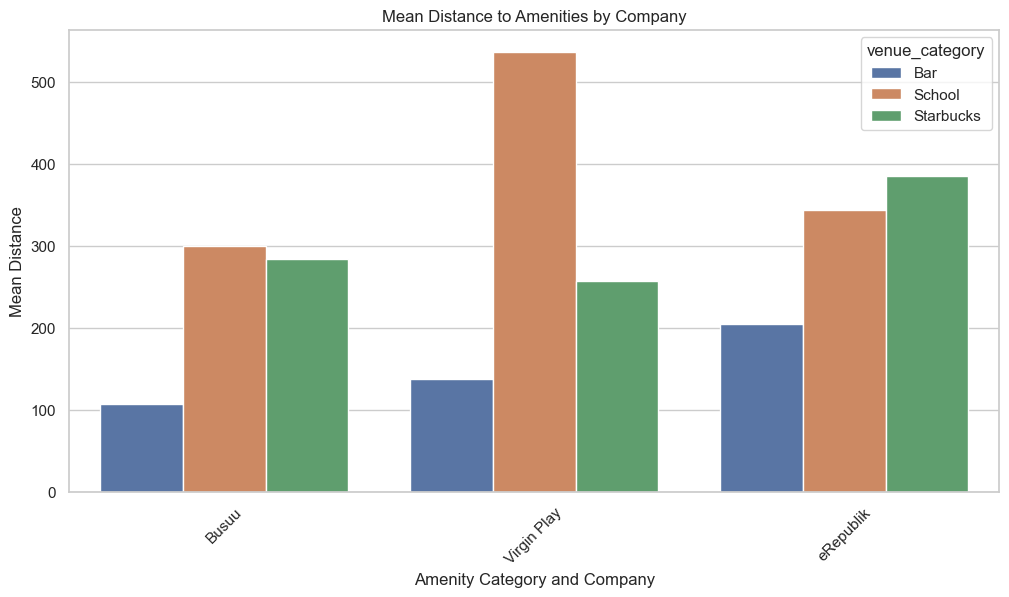

In [426]:
sns.barplot(x='company_name', hue = 'venue_category', y='mean_distance', data=filtered_df)

# Customize the plot
plt.title('Mean Distance to Amenities by Company')
plt.xlabel('Amenity Category and Company')
plt.ylabel('Mean Distance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability